In [1]:
#Display Python version
from platform import python_version      # view python version information
import platform                          # view operating platform information

print("The Python   version from my environment is ", python_version())
print("The Platform version from my environment is ", platform.platform(terse=True))
print("The Platform release from my environment is ", platform.version())

The Python   version from my environment is  3.10.9
The Platform version from my environment is  macOS-15.3.1
The Platform release from my environment is  Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112


In [2]:
#import important libraries
import pandas as pd           # for dataframe and data manipulation
from pandas import DataFrame
import numpy as np            # provides array objects and calculations

#import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2, mean_absolute_error as MAE, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import CSV file
import pandas as pd
med_df = pd.read_csv("medical_clean.csv")

In [4]:
#view dataset
med_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
## drop unused columns
med_df = med_df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
                      'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 
                      'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 
                      'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 
                      'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 
                      'Item4','Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [6]:
#view datatypes
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   Initial_admin       10000 non-null  object 
 2   HighBlood           10000 non-null  object 
 3   Stroke              10000 non-null  object 
 4   Complication_risk   10000 non-null  object 
 5   Overweight          10000 non-null  object 
 6   Arthritis           10000 non-null  object 
 7   Diabetes            10000 non-null  object 
 8   Hyperlipidemia      10000 non-null  object 
 9   BackPain            10000 non-null  object 
 10  Anxiety             10000 non-null  object 
 11  Allergic_rhinitis   10000 non-null  object 
 12  Reflux_esophagitis  10000 non-null  object 
 13  Asthma              10000 non-null  object 
 14  Services            10000 non-null  object 
 15  Initial_days        10000 non-null  float64
dtypes: fl

In [7]:
#check for duplicated/missing values
print(med_df.duplicated().value_counts())
print("")
print('Variables        Missing Values')
print('---------        --------------')
print(med_df.isna().sum())

False    10000
dtype: int64

Variables        Missing Values
---------        --------------
ReAdmis               0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
dtype: int64


[Text(0.5, 1.0, 'Initial_days')]

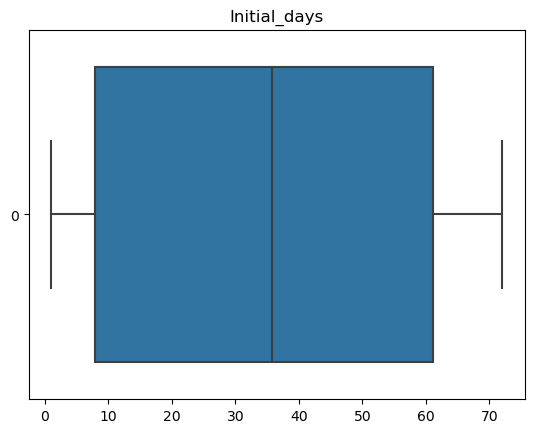

In [8]:
#check for outliers
import seaborn as sns
sns.boxplot(med_df.Initial_days, orient='h').set(title='Initial_days')

In [9]:
#One-Hot Encoding for (Yes/No) variables
prefix_list1 = ['ReAdmis','HighBlood', 'Stroke', 'Arthritis', 
               'Diabetes', 'Anxiety', 'Asthma',
               'Overweight', 'Hyperlipidemia', 'BackPain',
               'Allergic_rhinitis', 'Reflux_esophagitis']

prefix_dict = {'Yes': 1, 'No': 0}

for col in prefix_list1:
    med_df[col] = med_df[col].replace(prefix_dict)

In [10]:
#Get dummies for variables
ia = pd.get_dummies(med_df['Initial_admin'], prefix='IA', prefix_sep='_', drop_first=False)
cr = pd.get_dummies(med_df['Complication_risk'], prefix='CompRisk', prefix_sep='_', drop_first=False)
svc = pd.get_dummies(med_df['Services'], prefix='Svc', prefix_sep='_', drop_first=False)
med_df = pd.concat([med_df, ia, cr, svc], axis=1)
med_df = med_df.drop(['Initial_admin', 'Complication_risk', 'Services'], axis=1)

In [11]:
med_df.columns

Index(['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'IA_Elective Admission',
       'IA_Emergency Admission', 'IA_Observation Admission', 'CompRisk_High',
       'CompRisk_Low', 'CompRisk_Medium', 'Svc_Blood Work', 'Svc_CT Scan',
       'Svc_Intravenous', 'Svc_MRI'],
      dtype='object')

In [12]:
#rename columns
med_df.rename(columns = {'IA_Observation Admission': 'IA_Observation'}, inplace=True)
med_df.rename(columns = {'IA_Emergency Admission': 'IA_Emergency'}, inplace=True)
med_df.rename(columns = {'IA_Elective Admission': 'IA_Elective'}, inplace=True)
med_df.rename(columns = {'Svc_Intravenous': 'Svc_IV'}, inplace=True)
med_df.rename(columns = {'Svc_CT Scan': 'Svc_CT'}, inplace=True)
med_df.rename(columns = {'Svc_Blood Work': 'Svc_BW'}, inplace=True)

In [13]:
X = med_df.drop(['ReAdmis', 'Initial_days'],1)
y = med_df['ReAdmis']

from sklearn.feature_selection import SelectKBest, f_classif
skbest = SelectKBest(score_func=f_classif, k='all')

X_new = skbest.fit_transform(X,y)

p_values = pd.DataFrame({'Feature': X.columns,
                        'p_value': skbest.pvalues_}).sort_values('p_value')
#p_values[p_values['p_value']<0.5]
features_to_keep = p_values['Feature'][p_values['p_value']<0.5]
print(features_to_keep)

18            Svc_CT
19            Svc_IV
12      IA_Emergency
10            Asthma
6           BackPain
13    IA_Observation
11       IA_Elective
20           Svc_MRI
2         Overweight
3          Arthritis
Name: Feature, dtype: object


In [14]:
med_df.columns

Index(['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'IA_Elective',
       'IA_Emergency', 'IA_Observation', 'CompRisk_High', 'CompRisk_Low',
       'CompRisk_Medium', 'Svc_BW', 'Svc_CT', 'Svc_IV', 'Svc_MRI'],
      dtype='object')

In [15]:
med_df = med_df.drop(['HighBlood', 'Stroke', 'Diabetes',
       'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'CompRisk_High', 'CompRisk_Low',
       'CompRisk_Medium', 'Svc_BW'],axis=1)

In [17]:
#export CSV file
med_df.to_csv("medical_clean_d209_t2.csv")

In [18]:
#split the data into train/test sets
from sklearn.model_selection import train_test_split

X = med_df.drop(['ReAdmis'], axis=1)
y = med_df['ReAdmis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

X_train.to_csv("X_train_d209_t2.csv")
y_train.to_csv("y_train_d209_t2.csv")
X_test.to_csv("X_test_d209_t2.csv")
y_test.to_csv("y_test_d209_t2.csv")

#frames_train = [X_train, y_train]
#med_train = pd.concat(frames_train, axis=1)
#frames_test = [X_test, y_test]
#med_test = pd.concat(frames_test, axis=1)

#med_train.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/med_train_d209_t1.csv")
#med_test.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/med_test_d209_t1.csv")

In [19]:
# Voting Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=24)
rf = RandomForestClassifier(random_state=24)

classifiers = [('Decision Tree Classifier', dt),
               ('Random Forest Classifier', rf)]

for clf_name, clf in classifiers:
    #fit clf to training set
    clf.fit(X_train, y_train)
    
    #predict labels of test set
    y_pred = clf.predict(X_test)
    
    #evaluate accuracy of clf on test set
    print('{:s} : {:.4f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    

Decision Tree Classifier : 0.9695
Random Forest Classifier : 0.9815


In [20]:
#Initial DecisionTree classification
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#Initial model accuracy 
initial_accuracy = accuracy_score(y_test, y_pred)
print("The initial model accuracy is  ", np.round((initial_accuracy * 100),2), "%")

#Initial MSE, RMSE, R^2, MAE
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
r2_dt = R2(y_test, y_pred)
mae_dt = MAE(y_test, y_pred)
print("The initial model MSE is       ", np.round((mse_dt),4))
print("The initial model RMSE is      ", np.round((rmse_dt),4))
print("The initial model R-Squared is ", np.round((r2_dt),4))
print("The initial model MAE is       ", np.round((mae_dt),4))

The initial model accuracy is   96.95 %
The initial model MSE is        0.0305
The initial model RMSE is       0.1746
The initial model R-Squared is  0.8687
The initial model MAE is        0.0305


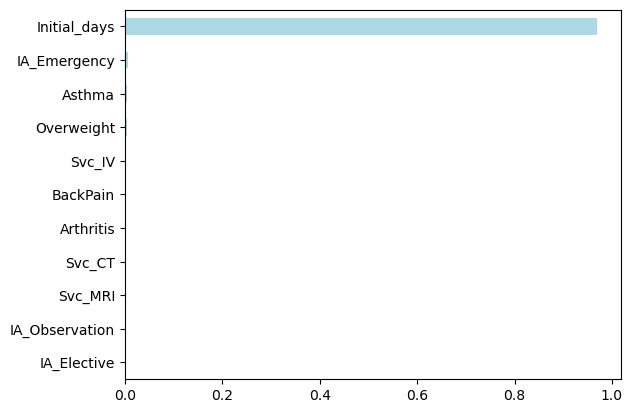

In [21]:
# Feature Importance

#create a series
importances_dt = pd.Series(dt.feature_importances_, index=X_train.columns)

#sort the values
sorted_importances_dt = importances_dt.sort_values()

#plot the sorted values
sorted_importances_dt.plot(kind='barh',
                          color='lightblue')
plt.show()

In [22]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 24,
 'splitter': 'best'}

In [23]:
#Grid Search to find best parameters
from sklearn.model_selection import GridSearchCV
import numpy as np

params_dt = {
    'max_depth': np.arange(2,10),
    'criterion': ('gini', 'entropy', 'log_loss'),
    'min_samples_leaf': np.arange(0.1, 0.24, 0.01),
    'min_samples_split': np.arange(2,32,2)
}

dt = DecisionTreeClassifier(random_state=24)
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=params_dt, 
                       cv=10,
                       scoring='accuracy',
                       n_jobs=-1)
grid_dt.fit(X_train, y_train)

print('Best Parameters: {}'.format(grid_dt.best_params_))
print('Best Score: {:.4f}'.format(grid_dt.best_score_))

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 2}
Best Score: 0.9785


In [24]:
training_score = grid_dt.score(X_train, y_train)
testing_score = grid_dt.score(X_test, y_test)

print("Training Accuracy:{:.4f}".format(training_score))
print("Testing Accuracy :{:.4f}".format(testing_score))

best_params_model = grid_dt.best_estimator_
test_acc = best_params_model.score(X_test, y_test)
print("Test set accuracy of best params model: {:.3f}".format(test_acc))

Training Accuracy:0.9789
Testing Accuracy :0.9760
Test set accuracy of best params model: 0.976


In [25]:
## Decision Tree model with best parameters

#dtc model
dt = DecisionTreeClassifier(max_depth=2,
                            criterion='gini',
                            min_samples_leaf=0.1,
                            min_samples_split=2,
                            random_state=24)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#accuracy_score
best_accuracy = accuracy_score(y_test, y_pred)
print("The best params model accuracy is  ", np.round((best_accuracy * 100),2), "%")

#MSE, RMSE, R^2, MAE scores
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
r2_dt = R2(y_test, y_pred)
mae_dt = MAE(y_test, y_pred)
print("The best params model MSE is       ", np.round((mse_dt),4))
print("The best params model RMSE is      ", np.round((rmse_dt),4))
print("The best params model R-Squared is ", np.round((r2_dt),4))
print("The best params model MAE is       ", np.round((mae_dt),4))

The best params model accuracy is   97.6 %
The best params model MSE is        0.024
The best params model RMSE is       0.1549
The best params model R-Squared is  0.8967
The best params model MAE is        0.024


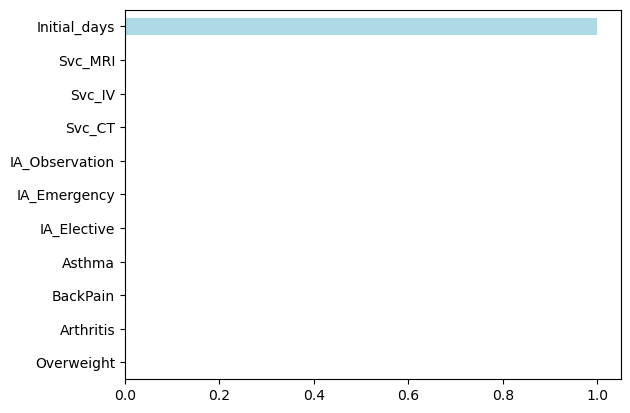

In [26]:
# Feature Importance

#create a series
importances_dt = pd.Series(dt.feature_importances_, index=X_train.columns)

#sort the values
sorted_importances_dt = importances_dt.sort_values()

#plot the sorted values
sorted_importances_dt.plot(kind='barh',
                          color='lightblue')
plt.show()

In [27]:
training_accuracy = dt.score(X_train, y_train)
testing_accuracy = dt.score(X_test, y_test)

y_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

training_mse = MSE(y_train, y_train_pred)
testing_mse = MSE(y_test, y_pred)

training_rmse = training_mse**(1/2)
testing_rmse = testing_mse**(1/2)

training_rsquared = R2(y_train, y_train_pred)
testing_rsquared = R2(y_test, y_pred)

print("Training Accuracy:{:.4f}".format(training_accuracy))
print("Testing Accuracy :{:.4f}".format(testing_accuracy))
print("")
print("MSE of Training Data:{:.4f}".format(training_mse))
print("MSE of Testing Data: {:.4f}".format(testing_mse))
print("")
print("Root MSE of Training Data:{:.4f}".format(training_rmse))
print("Root MSE of Testing Data: {:.4f}".format(testing_rmse))
print("")
print("R-Squared of Training Data:{:.4f}".format(training_rsquared))
print("R-Squared of Testing Data: {:.4f}".format(testing_rsquared))

Training Accuracy:0.9789
Testing Accuracy :0.9760

MSE of Training Data:0.0211
MSE of Testing Data: 0.0240

Root MSE of Training Data:0.1453
Root MSE of Testing Data: 0.1549

R-Squared of Training Data:0.9091
R-Squared of Testing Data: 0.8967


In [ ]:
## Decision Tree model with AdaBoosting

#import packages
#from sklearn.ensemble import AdaBoostClassifier

#instatiate the AdaBoost Classifier
#adb_clf = AdaBoostClassifier(base_estimator=dt,
#                             n_estimators=100,
#                             random_state=24)

#fit to the training set
#adb_clf.fit(X_train, y_train)

#predict the test set
#y_pred = adb_clf.predict(X_test)

#evaluate accuracy
#adb_clf_accuracy = accuracy_score(y_test, y_pred)
#print('AdaBoosting accuracy: {:.3f}'.format(adb_clf_accuracy))

In [ ]:
## Decision Tree model with GradientBoosting

#import packages
#from sklearn.ensemble import GradientBoostingClassifier

#instatiate the AdaBoost Classifier
#gbt = GradientBoostingClassifier(n_estimators=100,
#                                 random_state=24)

#fit to the training set
#gbt.fit(X_train, y_train)

#predict the test set probabilities of positive class
#y_pred = gbt.predict(X_test)

#evaluate roc_auc_score
#gbt_accuracy = accuracy_score(y_test, y_pred)
#print('Gradient Boosting Accuracy: {:.3f}'.format(gbt_accuracy))